# Machine Learning and Statistics

Tasks notebook for Machine Learning and Statistics @ GMIT - 2020

Author: Maciej Izydorek (G00387873@gmit.ie) Github: [mizydorek](https://github.com/mizydorek/Machine-Learning-Tasks-2020)


***

### Task 1 - Square root of 2

*Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places.*

$$ \sqrt{2} $$

*"The square root of 2 is irrational"*

Numbers that cannot be expressed as a ratio or fraction of natural numbers are called irrational and the famous example is the square root of 2, which is roughly 1.4142 and written in mathematics as $ \sqrt{2} $ or $ 2^{1/2} $. It is a positive algebraic number which multiplied by itself, equals 2. Geometrically is represented as diagonal across a square with sides of one unit length.[1]

### Heron's method

It is a most common iterative method [2] for approximating square roots known as the Heron's method after the first-century Greek philosopher Heron of Alexandria.[3] It takes an approximate guess and returns a new approximate result that is more accurate than the last one. This can be repeated as many times until the desired accuracy is reached.[4,5]

$$ x_{n+1} = \frac{x_{n} + \frac{a}{x_{n}}}{2} $$



In [1]:
# finding on how to generate square root of an integer to a digits of precision https://stackoverflow.com/questions/5187664/generating-digits-of-square-root-of-2

def sqrt2():
    '''
    Function that counts square root of 2 to 100 decimal places
    '''
    # Initial values
    a = 2
    digits = 100
    
    # finding the square root of 2 after multiplying by 10 raised to the 2* digits
    a = a * (10**(2*digits))
    x_n = 0
    x_n1 = 1 * (10**digits)

    # Apply Heron's method 
    while x_n != x_n1:
        x_n = x_n1
        x_n1 = (x_n + (a // x_n)) >> 1

    # convert to string 
    string = str(x_n1)
    # print out the result 
    print('The square root of 2 to 100 decimal places:')
    print("%s.%s" % (string[0:1], string[1:digits]))

if __name__ == '__main__':
    sqrt2()

The square root of 2 to 100 decimal places:
1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641572


### Verification

The result can be compare against *"The Square Root of Two to 1 Million Digits"* found on Nasa website.[6]



1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641572

### References

[1] Square root of 2 https://en.wikipedia.org/wiki/Square_root_of_2

[2] Heron's method http://assets.press.princeton.edu/chapters/s9487.pdf

[3] Square root https://en.wikipedia.org/wiki/Square_root

[4] Computing square root https://en.wikipedia.org/wiki/Methods_of_computing_square_roots

[5] A Note on Machine Method for Root Extraction http://www.spm.uem.br/bspm/pdf/next/151.pdf

[6] The Square Root of Two to 1 Million Digits https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil


<br>

***

<br>

#### Task 2 - The Chi Square test

*Use scipy.stats to verify value and calculate the associated p value for table posted on the Wikipedia Chi-Square article. You should include a short note with references justifying your analysis in a markdown cell.*

The formula to calculate Chi-square value or $ X^{2} $ is:

$$ X^{2} = \sum_{k=1}^n \frac{(O_k - E_k)^2}{E_k}$$
 
Where $ X $ is 22nd letter of Greek alphabet - Chi.

Chi-Square test is a statistical hypothesis test to determine whether there is a statistically significant difference between the expected  and the observed frequencies in one or more categories of a contingency table.

### Contingency table

A table showing the distribution of 3 groups of workers across four neighborhoods with a total number of 650 observed values.

|   | A | B | C | D | Total |
|---|:---:|:---:|:---:|:---:|:---:|
| White collar | 90 | 60 | 104 | 95 | 349 |
| Blue collar  | 30 | 50 | 51 | 20 | 151 |
| No collar | 30 | 40 | 45 | 35 | 150 |
| <b>Total</b> | <b>150</b> | <b>150</b> | <b>200</b> | <b>150</b> | <b>650</b> |

### Define the Hypothesis

A statistical method which evaluates two Hypothesis (statements) and determines which is true is called a Hypothesis Test.

H0: The residents and group of workers are not independent.

H1: The residents and group of workers are independent.

### Significance Level 

Also called as alpha value is a treshhold that determines whether the null hypothesis should be rejected or not. For the null hypothesis to be rejected the p-value should be less than the significance level. Usually in the range of 0.01 to 0.1

If p-value <= alpha: significant result, reject null hypothesis (H0)

If p-value > alpha: not significant result, fail to reject null hypothesis (H0)

In [2]:
alpha = 0.05

### Degrees of freedom

*degrees of freedom formula: (rows - 1) * (cols - 1)*

In our case:

Rows = 3 groups of workers

Columns = 4 neighborhoods

So we take (3 – 1) and multiply by (4 – 1) to get 6 degrees of freedom.

In [3]:
dof = 6

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats

### Dataset 

In [5]:
# Data set 
data = {'A':[90, 30, 30, 150],
        'B':[60, 50, 40, 150],
        'C':[104, 51, 45, 200],
        'D':[95, 20, 35, 150],
        'Total':[349, 151, 150, 650]} 

# Create a data frame
df = pd.DataFrame(data, index=['White collar', 'Blue collar', 'No collar', 'All'])
df

,A,B,C,D,Total
White collar,90,60,104,95,349
Blue collar,30,50,51,20,151
No collar,30,40,45,35,150
All,150,150,200,150,650


In [6]:
# 
observed = pd.DataFrame(df.iloc[0:3,0:4])
observed

,A,B,C,D
White collar,90,60,104,95
Blue collar,30,50,51,20
No collar,30,40,45,35


### Expected Frequency

Using formula below we calculate the expected frequency for each cell.

Expected = (row total * column total) / grand total


In [7]:
# np.outer compute the outer product of two vectors.
expected =  np.outer(df["Total"][0:3], df.loc["All"][0:4]) / 650

expected = pd.DataFrame(expected, 
            index=["White collar","Blue collar","No collar"], 
            columns=["A","B","C","D"])
expected


,A,B,C,D
White collar,80.538462,80.538462,107.384615,80.538462
Blue collar,34.846154,34.846154,46.461538,34.846154
No collar,34.615385,34.615385,46.153846,34.615385


### Chi-Square Statistic 

In [8]:
# Calculates the Chi-Square
# https://www.mathsisfun.com/data/chi-square-test.html
chi2_stat = (((observed-expected)**2)/expected).sum().sum()
chi2_stat

24.571202858582602

### Find the p-value


In [9]:
# Calculates the p value using Scipy chi2 module
# or approximate value can be taken from Chi-Square distribution tabel
# http://kisi.deu.edu.tr/joshua.cowley/Chi-square-table.pdf
p_value = 1 - stats.chi2.cdf(x=chi2_stat, df=6)
p_value

0.0004098425861096544

### SciPy chi2_contingency

All above calculation can be done using SciPy chi2_contingency module by passing just a Contingency table.


In [10]:
chi2, p, dof, expected = stats.chi2_contingency(observed)
print('Chi2: {}\n\nP-value: {}\n\nDegrees of freedom: {}\n\n'.format(chi2, p, dof))
expected = pd.DataFrame(expected, 
            index=["White collar","Blue collar","No collar"], 
            columns=["A","B","C","D"])
print('Expected Frequency:\n', expected)

Chi2: 24.5712028585826

P-value: 0.0004098425861096696

Degrees of freedom: 6


Expected Frequency:
                       A          B           C          D
White collar  80.538462  80.538462  107.384615  80.538462
Blue collar   34.846154  34.846154   46.461538  34.846154
No collar     34.615385  34.615385   46.153846  34.615385


### Evaluate the Hypothesis

In [11]:
# Evaluate whether to reject or keep null hypothesis
if p_value <= alpha:
    print('Dependent, reject null hypothesis (H0)')
else:
    print('Independent, fail to reject null hypothesis (H0)')

Dependent, reject null hypothesis (H0)


### Interpretation

The p-value obtained from Chi-Square test for independence on a given data set clearly shown that is significant and rejected null hypothesis. To conclude further, there is a significant relation between groups of workers across four neighborhoods. 

#### References

[1] Chi-Square test https://en.wikipedia.org/wiki/Chi-squared_test

[2] Scipy chi2 https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

[3] Scipy chi2_contingency https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

[4] Chi-Square Distribution Table http://kisi.deu.edu.tr/joshua.cowley/Chi-square-table.pdf

[5] Contingency table https://en.wikipedia.org/wiki/Contingency_table

[6] Pearson's chi-squared test https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test

***

#### Task 3 - The standard deviation 

*The standard deviation of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)) . However, Microsoft Excel has two different versions of the standard deviation calculation, STDEV.P and . The STDEV.P function performs the above calculation but in the   calculation the division is by len(x)-1 rather than len(x) . Research these Excel functions, writing a note in a Markdown cell about the difference between them. Then use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. Note that part of this task is to figure out the terminology in the previous sentence.*



The standard deviation is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance. In other words, the standard deviation tells, on average, how the values spread out from the center of the distribution. It is useful measure of spread for normal distribution where data is symmetrically distributed with no skew. If the data points are far from the mean, there is a high standard deviation within the data set, while the more clustered close to the mean (also called the expected value), the lower the standard deviation. Standard deviation is represented by the lower case Greek letter sigma $\sigma$, for the population standard deviation, or the Latin letter $s$, for the sample standard deviation.[1]

The Formula for Standard Deviation

$$ \sigma = \sqrt \frac {\sum_{i=1}^n(x_i - \overline x)^2} {n} $$

where: $ x_i $ = value of the $i^{th}$ point in the data set, $\overline x$ = the mean value of the data set and $n$ = the number of data points in the data set.

In [12]:
# Import packages.
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 14, 10

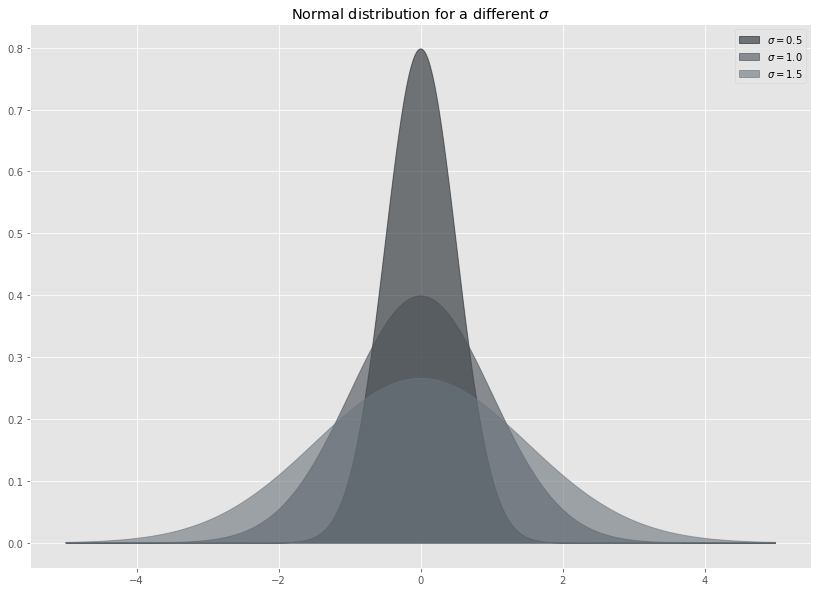

In [13]:
x = np.linspace(-5.0, 5.0, 1000)
plt.fill(x, ss.norm.pdf(x, loc=0.0, scale=0.5), color='#212529', alpha=0.6, lw=1.0, label="$\sigma = 0.5$");
plt.fill(x, ss.norm.pdf(x, loc=0.0, scale=1.0), color='#495057', alpha=0.6, lw=1.0, label="$\sigma = 1.0$");
plt.fill(x, ss.norm.pdf(x, loc=0.0, scale=1.5), color='#6C757D', alpha=0.6, lw=1.0, label="$\sigma = 1.5$");

plt.title("Normal distribution for a different $\sigma$")
plt.legend();

#### Empirical Rule
It is statistical rule also known as the three-sigma rule or 68-95-99.7 rule which states that that almost all observed data will lie within a band of three standard deviations of the mean in a normal distribution.[2]

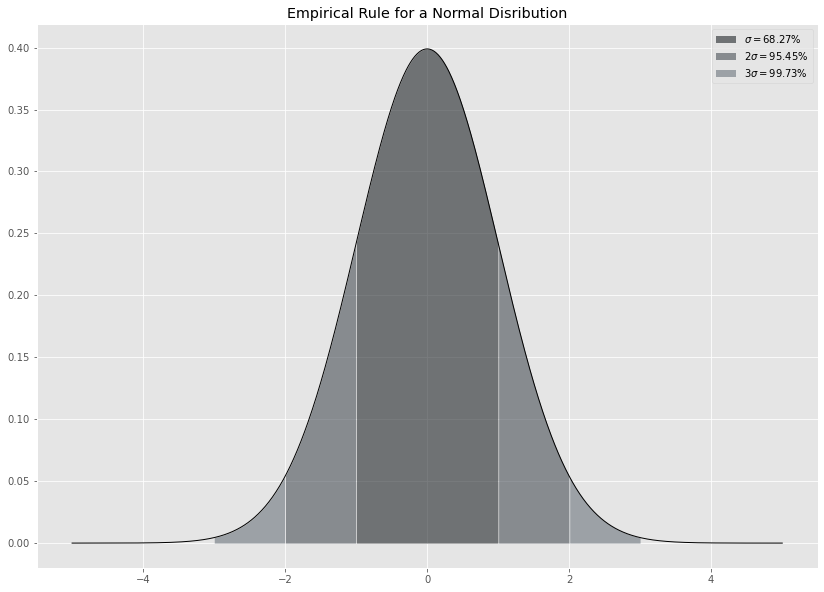

In [14]:
x = np.linspace(-5.0, 5.0, 1000)
plt.plot(x, ss.norm.pdf(x, loc=0.0, scale=1.0), 'k-', lw=1.0);

# σ
sigma = x[(-1.0 <= x) & (x <= 1.0)]
plt.fill_between(sigma, ss.norm.pdf(sigma), color='#212529', alpha=0.6, linewidth=0, label="$\sigma = 68.27\%$");
# 2σ
sigma = x[(-2.0 <= x) & (x <= -1.0)]
plt.fill_between(sigma, ss.norm.pdf(sigma), color='#495057', alpha=0.6, linewidth=0);
sigma = x[(1.0 <= x) & (x <= 2.0)]
plt.fill_between(sigma, ss.norm.pdf(sigma), color='#495057', alpha=0.6, linewidth=0, label="$2\sigma = 95.45\%$");
# 3σ
sigma = x[(-3.0 <= x) & (x <= -2.0)]
plt.fill_between(sigma, ss.norm.pdf(sigma), color='#6C757D', alpha=0.6, linewidth=0);
sigma = x[(2.0 <= x) & (x <= 3.0)]
plt.fill_between(sigma, ss.norm.pdf(sigma), color='#6C757D', alpha=0.6, linewidth=0, label="$3\sigma = 99.73\%$");

plt.title("Empirical Rule for a Normal Disribution")
plt.legend();

#### STDEV.P vs STDEV.S

STDEV.S is an Excel Statistical function that estimates standard deviation by using the "n-1 method" based on a sample of the population whereas STDEV.P uses "n method" to estimates the standard deviation based on the entire population.

$$ \sigma = \sqrt \frac {\sum_{i=1}^n(x_i - \overline x)^2} {n-1} \quad\quad \sigma = \sqrt \frac {\sum_{i=1}^n(x_i - \overline x)^2} {n} $$

#### References

[1] — [Standard deviation](https://en.wikipedia.org/wiki/Standard_deviation)

[2] — [Empirical rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)

[2] — [STDEV.S](https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23)

[3] — [STDEV.P](https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285#:~:text=P%20function,-Excel%20for%20Microsoft&text=Calculates%20standard%20deviation%20based%20on,average%20value%20(the%20mean))


***